In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import io
import math
import pandas as pd
import mplhep as hep

hep.style.use("ALICE")

In [2]:
def plot_syst(x, ex, y, ey, ax, color, width):
    for i in range(len(x)):
        box_x = x[i] - ex
        box_y = y[i] - ey[i]
        box_width = 2 * ex
        box_height = 2 * ey[i]
        rect = patches.Rectangle((box_x, box_y), box_width, box_height, fill=False, edgecolor=color, linewidth=width)
        ax.add_patch(rect)

In [3]:
dfRatioPsi2sJpsiVsPtAllRuns = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_fitter/analysis/LHC22_pass7_skimmed/all_runs/pt_dependence/systematic_ratio.txt', sep=' ')
ptMinAllRuns = dfRatioPsi2sJpsiVsPtAllRuns["x_min"]
ptMaxAllRuns = dfRatioPsi2sJpsiVsPtAllRuns["x_max"]
ptAllRuns = (ptMinAllRuns + ptMaxAllRuns) / 2.
errPtAllRuns = (ptMaxAllRuns - ptMinAllRuns) / 2.

ratioPsi2sJpsiVsPtAllRuns = dfRatioPsi2sJpsiVsPtAllRuns["val"]
statRatioPsi2sJpsiVsPtAllRuns = dfRatioPsi2sJpsiVsPtAllRuns["stat"]
systRatioPsi2sJpsiVsPtAllRuns = dfRatioPsi2sJpsiVsPtAllRuns["syst"]


dfRatioPsi2sJpsiVsPtPrel = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_run3_analyses/psi2S_jpsi_ratio/results/preliminary_ratio.txt', sep=' ')
ptMinPrel = dfRatioPsi2sJpsiVsPtPrel["x_min"]
ptMaxPrel = dfRatioPsi2sJpsiVsPtPrel["x_max"]
ptPrel = (ptMinPrel + ptMaxPrel) / 2.
errPtPrel = (ptMaxPrel - ptMinPrel) / 2.

ratioPsi2sJpsiVsPtPrel = dfRatioPsi2sJpsiVsPtPrel["val"]
statRatioPsi2sJpsiVsPtPrel = dfRatioPsi2sJpsiVsPtPrel["stat"]
systRatioPsi2sJpsiVsPtPrel = dfRatioPsi2sJpsiVsPtPrel["syst"]


dfRatioPsi2sJpsiVsPtGoodRuns = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_fitter/analysis/LHC22_pass7_skimmed/good_runs/pt_dependence/systematic_ratio.txt', sep=' ')
ptMinGoodRuns = dfRatioPsi2sJpsiVsPtAllRuns["x_min"]
ptMaxGoodRuns = dfRatioPsi2sJpsiVsPtAllRuns["x_max"]
ptGoodRuns = (ptMinGoodRuns + ptMaxGoodRuns) / 2.
errPtGoodRuns = (ptMaxGoodRuns - ptMinGoodRuns) / 2.

ratioPsi2sJpsiVsPtGoodRuns = dfRatioPsi2sJpsiVsPtGoodRuns["val"]
statRatioPsi2sJpsiVsPtGoodRuns = dfRatioPsi2sJpsiVsPtGoodRuns["stat"]
systRatioPsi2sJpsiVsPtGoodRuns = dfRatioPsi2sJpsiVsPtGoodRuns["syst"]


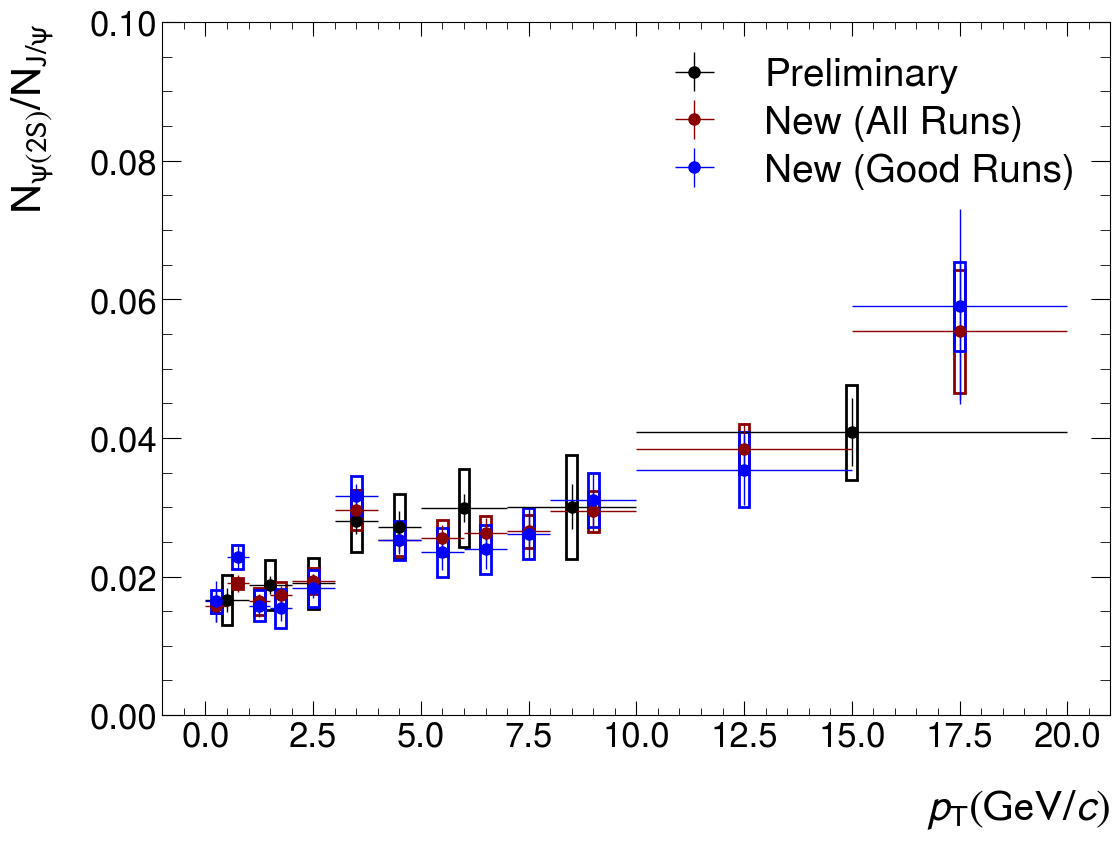

In [4]:
# Creating histogram
fig, ax = plt.subplots()
plot_syst(ptPrel, 0.125, ratioPsi2sJpsiVsPtPrel, systRatioPsi2sJpsiVsPtPrel, ax, 'black', 2)
plot_syst(ptAllRuns, 0.125, ratioPsi2sJpsiVsPtAllRuns, systRatioPsi2sJpsiVsPtAllRuns, ax, 'darkred', 2)
plot_syst(ptGoodRuns, 0.125, ratioPsi2sJpsiVsPtGoodRuns, systRatioPsi2sJpsiVsPtGoodRuns, ax, 'blue', 2)

plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$N_{\psi(\rm{2S})} / N_{\rm{J}/\psi}$')
plt.ylim(0, 0.10)
#plt.yscale('log')
plt.errorbar(ptPrel, ratioPsi2sJpsiVsPtPrel, xerr=errPtPrel, yerr=statRatioPsi2sJpsiVsPtPrel, label="Preliminary", fmt='o', color='black', ecolor='black')
plt.errorbar(ptAllRuns, ratioPsi2sJpsiVsPtAllRuns, xerr=errPtAllRuns, yerr=statRatioPsi2sJpsiVsPtAllRuns, label="New (All Runs)", fmt='o', color='darkred', ecolor='darkred')
plt.errorbar(ptGoodRuns, ratioPsi2sJpsiVsPtGoodRuns, xerr=errPtGoodRuns, yerr=statRatioPsi2sJpsiVsPtGoodRuns, label="New (Good Runs)", fmt='o', color='blue', ecolor='blue')
plt.legend(loc='upper right')
#plt.text(6, 3e5, r'This work, Pb-Pb, $\sqrt{s_{\rm{NN}}} = 5.36 TeV$', fontsize=25)
#plt.text(6, 1.5e5, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4', fontsize=25)
#plt.savefig("/Users/lucamicheletti/GITHUB/jpsi_flow_run3/figures/sig_jpsi_vs_pt_vs_centrality.pdf", format="pdf", bbox_inches="tight")
plt.show()